<a href="https://colab.research.google.com/github/Bhavnish04/Ai-mini-project/blob/main/Basic_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

In [208]:
# Create weight and bias
weight= 0.3
bias=0.9
# Create range values
start =0
end=200
step= 2
# Create X and y (features and labels)
X= torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias



In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.float()
y_train = y_train.float()
X_test = X_test.float()
y_test = y_test.float()


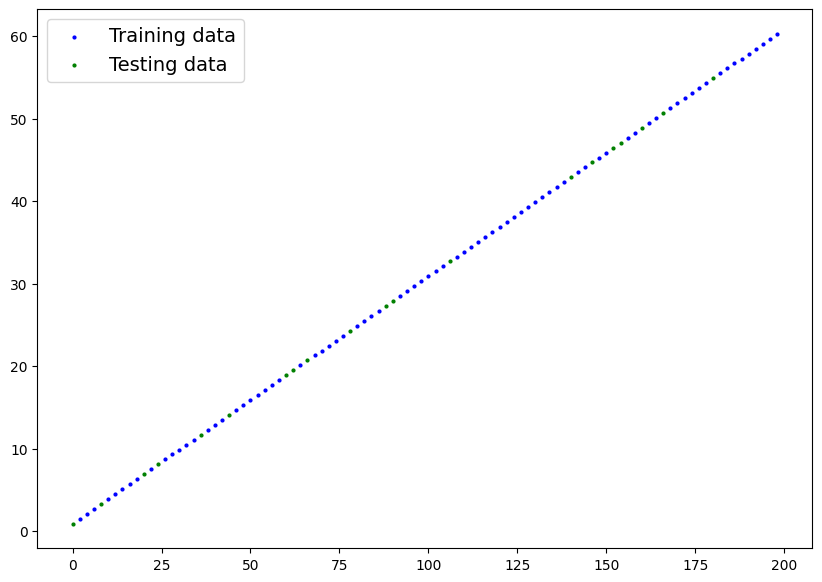

In [210]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions();

BUILD MODEL

In [211]:
from torch import nn

In [212]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)


In [213]:
model_0 = LinearRegressionModel()
# List named parameters
model_0.state_dict()

OrderedDict([('linear.weight', tensor([[-0.7915]])),
             ('linear.bias', tensor([0.0655]))])

In [214]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)
 # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [215]:
epochs = 200
for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")


Epoch 0 | Train Loss: 111.6173 | Test Loss: 97.8841
Epoch 20 | Train Loss: 109.5674 | Test Loss: 96.0842
Epoch 40 | Train Loss: 107.5174 | Test Loss: 94.2842
Epoch 60 | Train Loss: 105.4674 | Test Loss: 92.4842
Epoch 80 | Train Loss: 103.4175 | Test Loss: 90.6842
Epoch 100 | Train Loss: 101.3675 | Test Loss: 88.8843
Epoch 120 | Train Loss: 99.3175 | Test Loss: 87.0843
Epoch 140 | Train Loss: 97.2675 | Test Loss: 85.2843
Epoch 160 | Train Loss: 95.2176 | Test Loss: 83.4843
Epoch 180 | Train Loss: 93.1676 | Test Loss: 81.6843


In [218]:
# Save the state_dict of the trained model
torch.save(model_0.state_dict(), "trained_model.pth")


RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.weight", "0.bias", "2.weight", "2.bias". 
	Unexpected key(s) in state_dict: "linear.weight", "linear.bias". 